In [1]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
# from astroquery.gama import GAMA
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
# %matplotlib notebook
################################################################

# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################

# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
jtplot.style(theme='grade3', context='notebook', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

In [2]:
completed_data = pd.read_pickle(PATH_DATA + 'GAMADataForManifold.pickle')
DATA_GAMA_FLUX = completed_data.copy()

In [3]:
display(completed_data.describe())

RA           DEC      FUV_flux   FUV_fluxerr      NUV_flux  \
count  73768.000000  73768.000000  7.376800e+04  7.376800e+04  7.376800e+04   
mean     189.651980      0.375954  9.691125e-06  1.433836e-06  1.771798e-05   
std       33.758608      1.356445  7.012375e-05  1.041517e-05  1.183519e-04   
min      129.000109     -2.993768  3.332060e-10  5.765690e-09  9.628900e-10   
25%      175.047449     -0.746373  1.254405e-06  6.841088e-07  4.301507e-06   
50%      212.479781      0.323242  3.529270e-06  8.983840e-07  9.155720e-06   
75%      217.577880      1.461775  8.657525e-06  1.233078e-06  1.696793e-05   
max      223.499878      2.999971  1.114510e-02  1.909930e-03  2.128940e-02   

        NUV_fluxerr        u_flux     u_fluxerr        g_flux     g_fluxerr  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   6.959949e-06  3.941530e-05  5.811074e-06  1.233047e-04  6.644793e-06   
std    7.378952e-05  3.199671e-04  2.849965e-05  1.023210e-03  2.587866e-05   
min    3.340650e-08  1.335430e-08  2.499510e-07  4.235320e-08  1.292490e-07   
25%    9.051390e-07  9.912963e-06  1.989115e-06  3.048285e-05  9.470705e-07   
50%    1.337930e-06  1.797575e-05  2.772085e-06  5.210875e-05  1.543505e-06   
75%    2.466845e-06  3.337297e-05  4.167825e-06  9.683630e-05  3.796227e-06   
max    8.833300e-03  5.932940e-02  1.740130e-03  1.802290e-01  1.697120e-03   

             r_flux     r_fluxerr        i_flux     i_fluxerr        z_flux  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   2.410331e-04  9.234676e-06  3.432591e-04  1.262331e-05  4.200821e-04   
std    1.833359e-03  3.051119e-05  2.540001e-03  3.919699e-05  3.083389e-03   
min    1.538570e-08  1.932670e-07  3.210630e-08  2.658190e-07  4.034540e-08   
25%    6.772207e-05  1.510898e-06  9.731525e-05  2.303157e-06  1.206148e-04   
50%    1.118075e-04  2.541675e-06  1.616545e-04  3.871210e-06  1.992710e-04   
75%    1.949315e-04  5.820015e-06  2.830255e-04  8.681093e-06  3.484990e-04   
max    3.142220e-01  2.135520e-03  4.250200e-01  2.806200e-03  5.119440e-01   

          z_fluxerr        X_flux     X_fluxerr        Y_flux     Y_fluxerr  \
count  7.376800e+04  73768.000000  73768.000000  7.376800e+04  73768.000000   
mean   2.667000e-05     -4.725897     -4.726298  5.097796e-04      0.000035   
std    9.312436e-05     68.551593     68.551566  3.493307e-03      0.000169   
min    9.431560e-07   -999.000000   -999.000000  1.016350e-07      0.000001   
25%    7.361505e-06      0.000121      0.000003  1.429553e-04      0.000006   
50%    1.091005e-05      0.000201      0.000006  2.402225e-04      0.000010   
75%    1.832998e-05      0.000351      0.000013  4.254310e-04      0.000021   
max    4.074100e-03      0.418524      0.003546  5.234810e-01      0.010409   

             J_flux     J_fluxerr        H_flux     H_fluxerr        K_flux  \
count  7.376800e+04  73768.000000  7.376800e+04  73768.000000  7.376800e+04   
mean   6.000265e-04      0.000032  7.329608e-04      0.000037  7.477631e-04   
std    4.066153e-03      0.000131  4.841449e-03      0.000115  4.133784e-03   
min    9.308100e-07      0.000001  7.511100e-07      0.000002  5.765860e-07   
25%    1.667140e-04      0.000006  2.051290e-04      0.000011  2.323077e-04   
50%    2.856250e-04      0.000010  3.538470e-04      0.000016  4.020560e-04   
75%    5.096573e-04      0.000021  6.330400e-04      0.000029  7.051335e-04   
max    6.192200e-01      0.008726  7.565100e-01      0.006519  6.328390e-01   

          K_fluxerr       W1_flux    W1_fluxerr       W2_flux    W2_fluxerr  \
count  73768.000000  73768.000000  73768.000000  7.376800e+04  73768.000000   
mean       0.000038      0.000396      0.000068  2.707400e-04      0.000066   
std        0.000131      0.002416      0.000197  1.440871e-03      0.000228   
min        0.000003      0.000000      0.000005 -5.913180e-09      0.000004   
25%        0.000011      0.000130      0.000039  9.226087e-05 

In [4]:
# Select columns for classification and manifold learning
# X = completed_data[['Z_TONRY', 'FUV_flux_kcorrected', 'NUV_flux_kcorrected',
#                     'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
#                     'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

# Select columns for classification and manifold learning
X_ORIG = completed_data[['FUV_flux_kcorrected', 'NUV_flux_kcorrected',
                    'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
                    'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

In [5]:
x_diff = []

orig_data = np.array(X_ORIG)#[:100,:]
i=0
j=1

p = 0
while i<11:
    while j <11:
        diff = orig_data[:,i] - orig_data[:,j]
        x_diff.append(diff)
#         print(i,j)
        p += 1
        
        j+=1
    i += 1
    j = i+1
    
x_diff.append(completed_data['Z_TONRY'])

x_diff.append(completed_data['FUV_flux_kcorrected'])
x_diff.append(completed_data['NUV_flux_kcorrected'])
x_diff.append(completed_data['U_flux_kcorrected'])
x_diff.append(completed_data['G_flux_kcorrected'])
x_diff.append(completed_data['R_flux_kcorrected'])
x_diff.append(completed_data['I_flux_kcorrected'])
x_diff.append(completed_data['Z_flux_kcorrected'])
x_diff.append(completed_data['Y_flux_kcorrected'])
x_diff.append(completed_data['J_flux_kcorrected'])
x_diff.append(completed_data['H_flux_kcorrected'])
x_diff.append(completed_data['K_flux_kcorrected'])
    
# print(f"p={p}")
x_diff = np.array(x_diff)
X_DIFF = pd.DataFrame(x_diff.T)
# X_DIFF = X_DIFF.sample(frac=1).reset_index(drop=True)
X_DIFF.describe()

0             1             2             3             4   \
count  73768.000000  73768.000000  73768.000000  73768.000000  73768.000000   
mean       0.882871      2.065310      3.366755      3.954850      4.203319   
std        0.995514      1.361603      1.447497      1.558758      1.635473   
min       -9.111224     -5.804138     -5.965029     -7.268533     -6.942234   
25%        0.396928      1.207778      2.327079      2.812168      2.994479   
50%        0.747496      1.842982      3.070787      3.663646      3.927112   
75%        1.271850      2.756030      4.168403      4.868629      5.193147   
max        9.457386     10.733571     11.970005     13.045792     13.403488   

                 5             6             7             8             9   \
count  73768.000000  73768.000000  73768.000000  73768.000000  73768.000000   
mean       4.423710      4.657363      4.711682      4.952283      4.721597   
std        1.679660      1.712884      1.729092      1.767449      1.768675   
min       -6.837052     -5.921695     -3.637670     -3.478928     -3.737771   
25%        3.190524      3.389938      3.433777      3.652055      3.414967   
50%        4.171996      4.413001      4.479980      4.735457      4.507436   
75%        5.460195      5.727149      5.800215      6.075255      5.857913   
max       13.565696     13.805895     13.979614     14.198858     14.052436   

                 10            11            12            13            14  \
count  73768.000000  73768.000000  73768.000000  73768.000000  73768.000000   
mean       1.182439      2.483884      3.071979      3.320448      3.540839   
std        1.033877      1.158971      1.280014      1.360335      1.409895   
min       -4.718561     -3.834861     -2.575391     -2.327989     -2.728525   
25%        0.584734      1.683730      2.162414      2.341424      2.533181   
50%        1.000400      2.196345      2.790871      3.058134      3.300425   
75%        1.586113      2.996622      3.708544      4.045664      4.320242   
max       11.766392     13.020297     13.525084     13.866006     13.979178   

                 15            16            17            18            19  \
count  73768.000000  73768.000000  73768.000000  73768.000000  73768.000000   
mean       3.774492      3.828811      4.069412      3.838726      1.301445   
std        1.445769      1.463245      1.504924      1.505138      0.547913   
min       -2.446400     -3.504638     -3.005930     -4.191618     -3.000651   
25%        2.730013      2.767247      2.984861      2.747701      0.973441   
50%        3.545301      3.610397      3.865422      3.639255      1.192820   
75%        4.592840      4.672033      4.954731      4.734458      1.503832   
max       14.165482     14.211712     14.421170     14.210595      7.127666   

                 20            21            22            23            24  \
count  73768.000000  73768.000000  73768.000000  73768.000000  73768.000000   
mean       1.889540      2.138010      2.358400      2.592053      2.646372   
std        0.643531      0.723282      0.780430      0.811535      0.832902   
min       -4.304155     -3.977856     -3.872674     -2.957317     -4.008833   
25%        1.463547      1.642604      1.832842      2.030682      2.068361   
50%        1.789046      2.056858      2.306853      2.546478      2.614102   
75%        2.204037      2.534481      2.813697      3.077378      3.152568   
max        7.546526      7.979632      8.211367      8.482983      8.604220   

                 25            26            27            28            29  \
count  73768.000000  73768.000000  73768.000000  73768.000000  73768.000000   
mean       2.886973      2.656287      0.588095      0.836564      1.056955   
std        0.878915      0.884603      0.172508      0.280614      0.363481   
min       -2.950851     -3.973851     -1.303503     -2.166429     -3.526895   
25%        2.283446      2.050288      0.465404      0.636640 

In [6]:
# # LABELS
# i=0
# j=1

# p = 0
# while i<11:
#     while j <11:
# #         diff = orig_data[:,i] - orig_data[:,j]
# #         x_diff.append(diff)

#         print(f"{p}th data is {i}-{j}")
#         p += 1
        
#         j+=1
#     i += 1
#     j = i+1
    
# print(f"p={p}")

In [7]:
# RobustScaler uses [0.25, 0.75] samples
# sc=preprocessing.RobustScaler(quantile_range=(25, 75))#StandardScaler()
sc=preprocessing.StandardScaler(with_mean=True, with_std=False)
# sc=preprocessing.RobustScaler()
sc.fit(X_DIFF)
X_DIFF=sc.transform(X_DIFF)

x=X_DIFF[:,0]
y=X_DIFF[:,1]

# print(X_norm)

pd.DataFrame(X_DIFF).describe()

0             1             2             3             4   \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean  -2.777665e-17 -2.696996e-17 -3.576890e-16  4.887341e-16 -7.436002e-17   
std    9.955139e-01  1.361603e+00  1.447497e+00  1.558758e+00  1.635473e+00   
min   -9.994096e+00 -7.869448e+00 -9.331784e+00 -1.122338e+01 -1.114555e+01   
25%   -4.859435e-01 -8.575323e-01 -1.039676e+00 -1.142682e+00 -1.208841e+00   
50%   -1.353746e-01 -2.223280e-01 -2.959681e-01 -2.912040e-01 -2.762077e-01   
75%    3.889785e-01  6.907199e-01  8.016476e-01  9.137786e-01  9.898273e-01   
max    8.574515e+00  8.668261e+00  8.603250e+00  9.090942e+00  9.200169e+00   

                 5             6             7             8             9   \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   3.301411e-16  4.180825e-16 -5.642982e-16 -8.763309e-16  4.074390e-17   
std    1.679660e+00  1.712884e+00  1.729092e+00  1.767449e+00  1.768675e+00   
min   -1.126076e+01 -1.057906e+01 -8.349352e+00 -8.431211e+00 -8.459368e+00   
25%   -1.233186e+00 -1.267425e+00 -1.277905e+00 -1.300228e+00 -1.306630e+00   
50%   -2.517141e-01 -2.443617e-01 -2.317020e-01 -2.168261e-01 -2.141612e-01   
75%    1.036485e+00  1.069787e+00  1.088533e+00  1.122972e+00  1.136316e+00   
max    9.141986e+00  9.148532e+00  9.267932e+00  9.246575e+00  9.330839e+00   

                 10            11            12            13            14  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean  -7.657541e-18  3.848035e-16  4.224169e-16  6.943319e-16  4.489534e-16   
std    1.033877e+00  1.158971e+00  1.280014e+00  1.360335e+00  1.409895e+00   
min   -5.901000e+00 -6.318745e+00 -5.647371e+00 -5.648438e+00 -6.269364e+00   
25%   -5.977047e-01 -8.001538e-01 -9.095656e-01 -9.790247e-01 -1.007658e+00   
50%   -1.820390e-01 -2.875395e-01 -2.811086e-01 -2.623141e-01 -2.404141e-01   
75%    4.036740e-01  5.127383e-01  6.365650e-01  7.252155e-01  7.794030e-01   
max    1.058395e+01  1.053641e+01  1.045310e+01  1.054556e+01  1.043834e+01   

                 15            16            17            18            19  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean  -2.711444e-16 -4.470270e-16  4.080651e-16  1.533916e-16  2.161208e-17   
std    1.445769e+00  1.463245e+00  1.504924e+00  1.505138e+00  5.479134e-01   
min   -6.220892e+00 -7.333449e+00 -7.075341e+00 -8.030344e+00 -4.302096e+00   
25%   -1.044478e+00 -1.061563e+00 -1.084551e+00 -1.091026e+00 -3.280042e-01   
50%   -2.291909e-01 -2.184139e-01 -2.039894e-01 -1.994708e-01 -1.086255e-01   
75%    8.183489e-01  8.432220e-01  8.853196e-01  8.957316e-01  2.023866e-01   
max    1.039099e+01  1.038290e+01  1.035176e+01  1.037187e+01  5.826221e+00   

                 20            21            22            23            24  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean  -1.388953e-16 -4.584892e-17 -5.996481e-16  4.642685e-17 -6.321083e-16   
std    6.435307e-01  7.232817e-01  7.804301e-01  8.115348e-01  8.329023e-01   
min   -6.193695e+00 -6.115866e+00 -6.231074e+00 -5.549369e+00 -6.655205e+00   
25%   -4.259937e-01 -4.954054e-01 -5.255577e-01 -5.613706e-01 -5.780112e-01   
50%   -1.004940e-01 -8.115153e-02 -5.154701e-02 -4.557470e-02 -3.227016e-02   
75%    3.144969e-01  3.964716e-01  4.552968e-01  4.853256e-01  5.061960e-01   
max    5.656986e+00  5.841623e+00  5.852967e+00  5.890930e+00  5.957848e+00   

                 25            26            27            28            29  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   1.228096e-16 -5.050606e-16  2.298466e-17  1.865743e-16 -1.343923e-16   
std    8.789154e-01  8.846031e-01  1.725083e-01  2.806138e-01  3.634812e-01   
min   -5.837824e+00 -6.630139e+00 -1.891599e+00 -3.002993e+00 -4.583850e+00   
25%   -6.035269e-01 -6.059990e-01 -1.226910e-01 -1.999241e-01 

In [8]:
N_COMP = 11

#Execute the K-means
cluster_model=cluster.AgglomerativeClustering(n_clusters = N_COMP)
cluster_model.fit(X_DIFF)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=11,
                        pooling_func='deprecated')

In [9]:
labels = cluster_model.labels_

In [10]:
lab = cluster_model.labels_
n_clusters = np.unique(lab).size
print("Number of detected clusters = ", n_clusters)

Number of detected clusters =  11


In [11]:
# Add the label from KMEANS to the original pd.DataFrame
data_for_manifoldlearning_plus_label = X_ORIG.join(pd.DataFrame(labels, index=X_ORIG.index, columns=['label']))
DATA_GAMA_FLUX = DATA_GAMA_FLUX.join(pd.DataFrame(labels, index=X_ORIG.index, columns=['label']))

label:0, center_point=(0.9096086910752991, 2.9541111870939547)
# of samples : 13673
label:1, center_point=(1.0097206511222159, 3.569937300261105)
# of samples : 8845
label:2, center_point=(0.3938784247491342, 1.9464559575797797)
# of samples : 11976
label:3, center_point=(0.7628376528132681, 2.7991132885423555)
# of samples : 5914
label:4, center_point=(1.0079587830425925, 5.111012381240562)
# of samples : 2980
label:5, center_point=(1.0445138152781277, 4.819276529832854)
# of samples : 6691
label:6, center_point=(0.731979077352388, 2.253629786178681)
# of samples : 11506
label:7, center_point=(0.20384339348274538, 1.837212973675562)
# of samples : 5560
label:8, center_point=(0.9830323266095279, 3.6325721089588754)
# of samples : 2769
label:9, center_point=(0.9502174117504202, 5.0184099226418155)
# of samples : 3269
label:10, center_point=(1.005907594814391, 8.02709906300329)
# of samples : 585



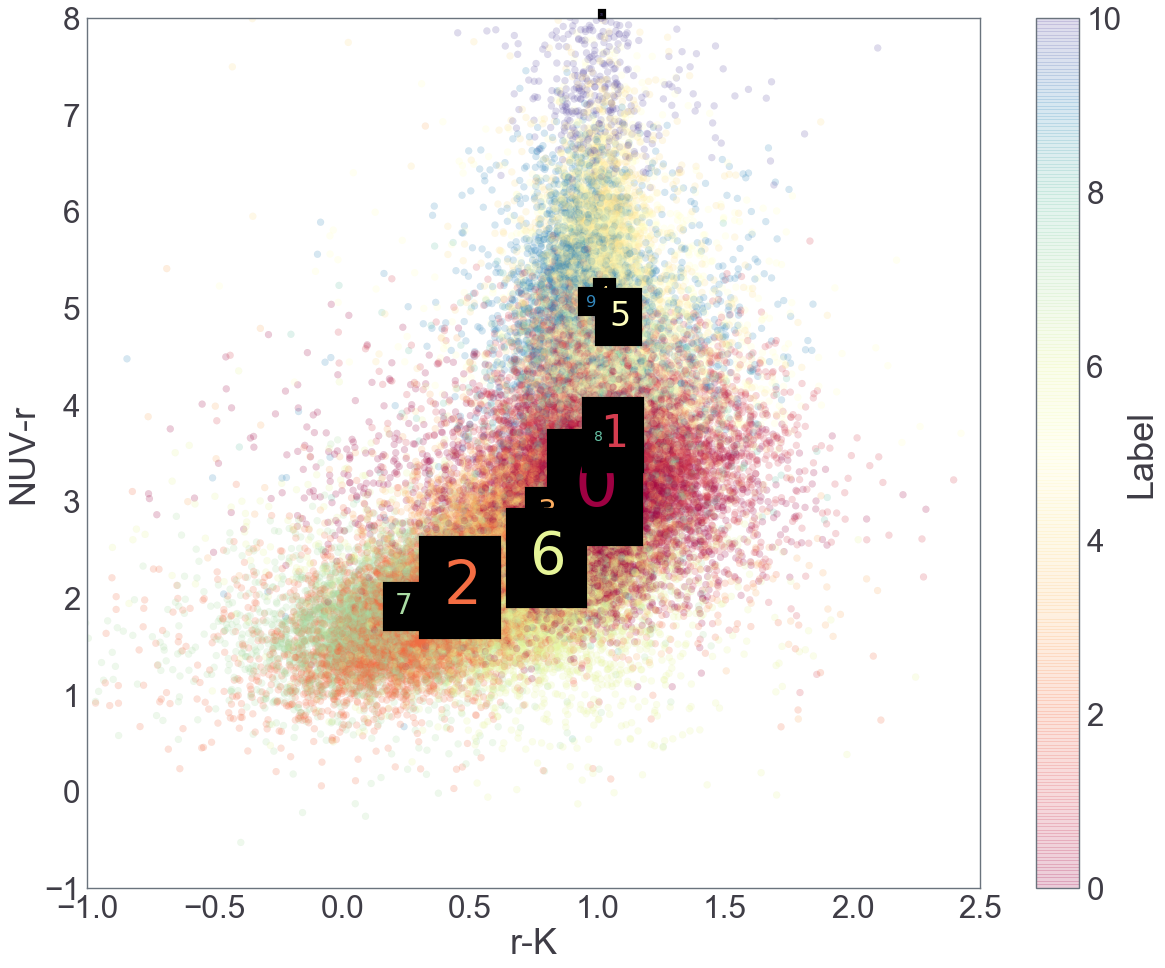

In [12]:
# Show the color-color plot with labels (each number on the plot shows the label number)

plt.figure(figsize=(20, 16))
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=N_COMP-1)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])

for i in tnrange(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(i, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])))
    plt.text(x_mean, y_mean, '$%s$'%(i), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])/200, color=plt.cm.Spectral(i/(N_COMP-1)))
    

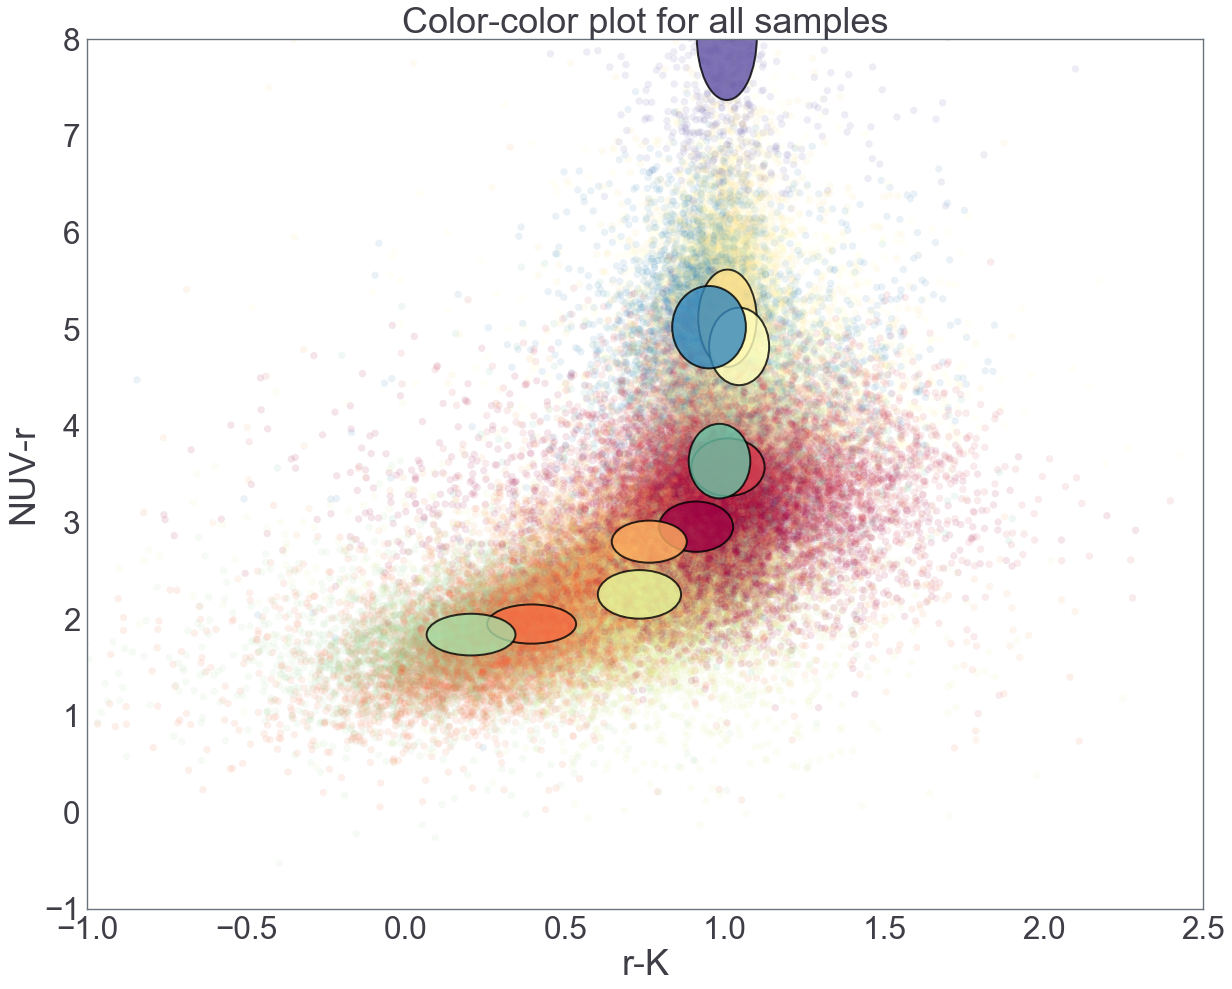

In [15]:
# Show the color-color plot with labels (each number on the plot shows the label number)

f = plt.figure(figsize=(20, 16))
ax = f.add_subplot(111)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.8, angle = 0, 
                        facecolor =plt.cm.Spectral(j/(N_COMP-1)), edgecolor='black', lw = 2)
        ax.add_patch(e1)

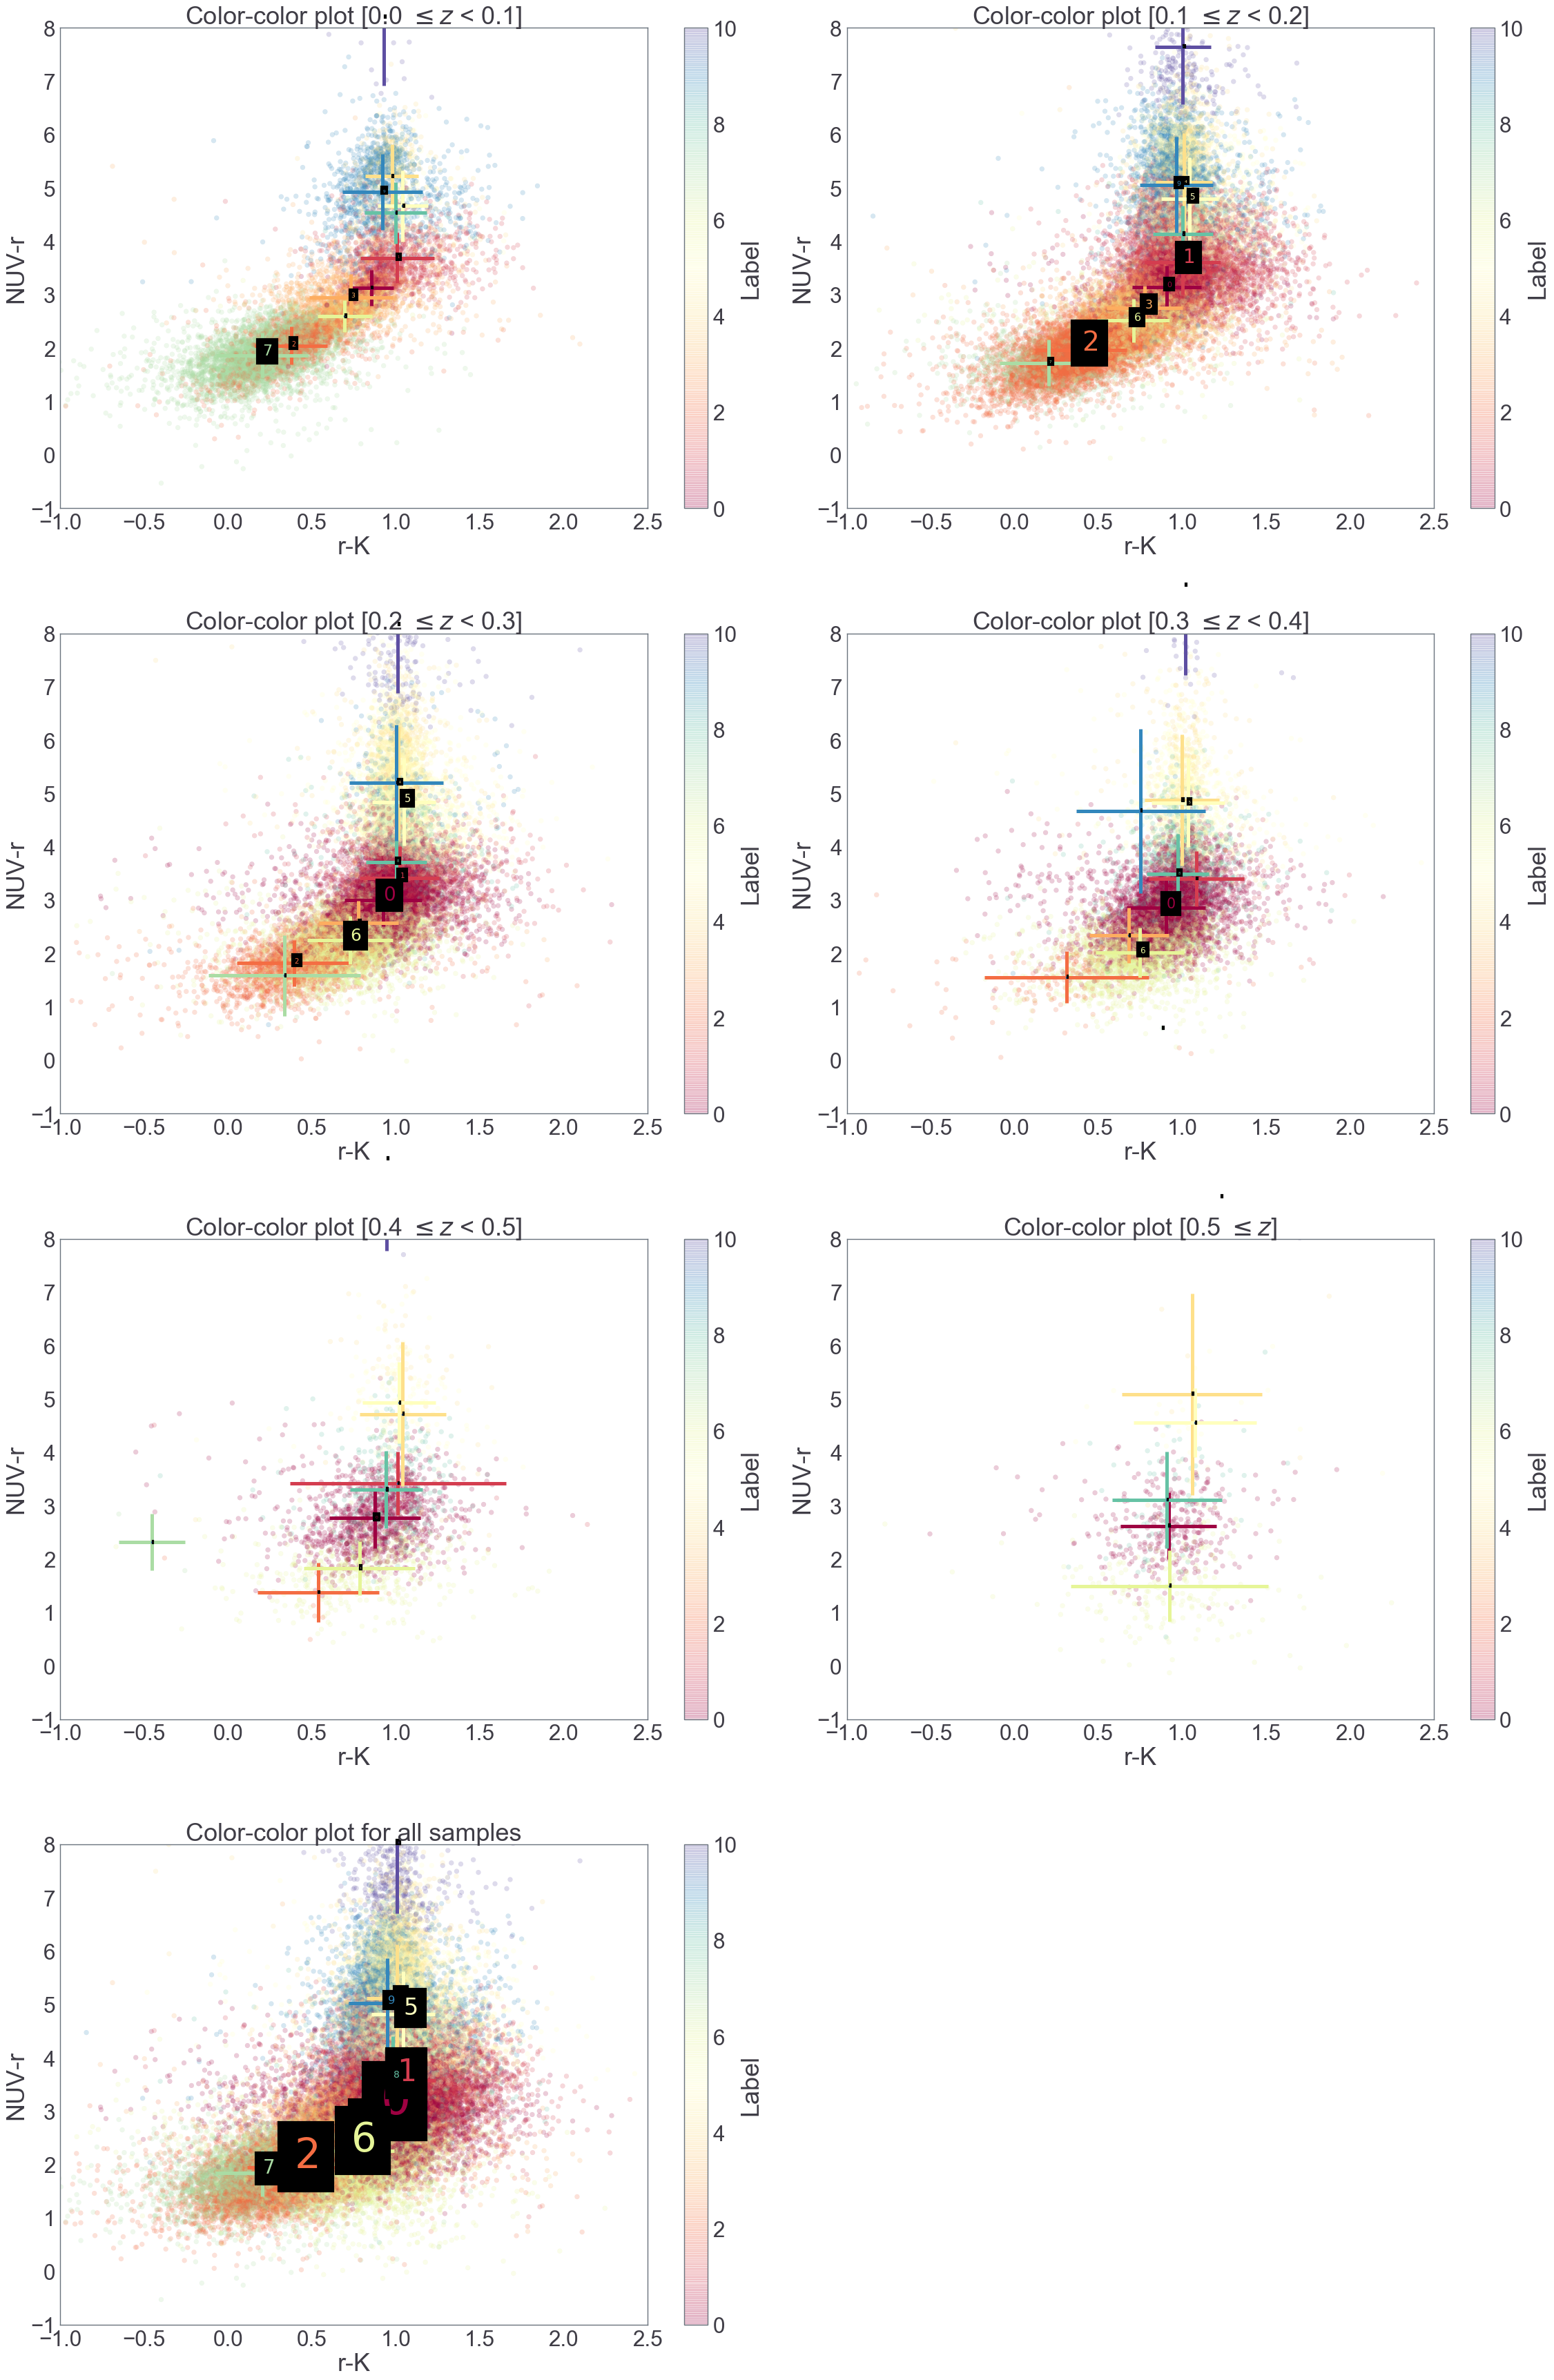

In [13]:
#  Color-color plot with colorbars based on redshift
plt.figure(figsize=(32, 48))
for i in tnrange(6):
    if i <= 4:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=N_COMP-1)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
    else:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=N_COMP-1)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=N_COMP-1)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.tight_layout()

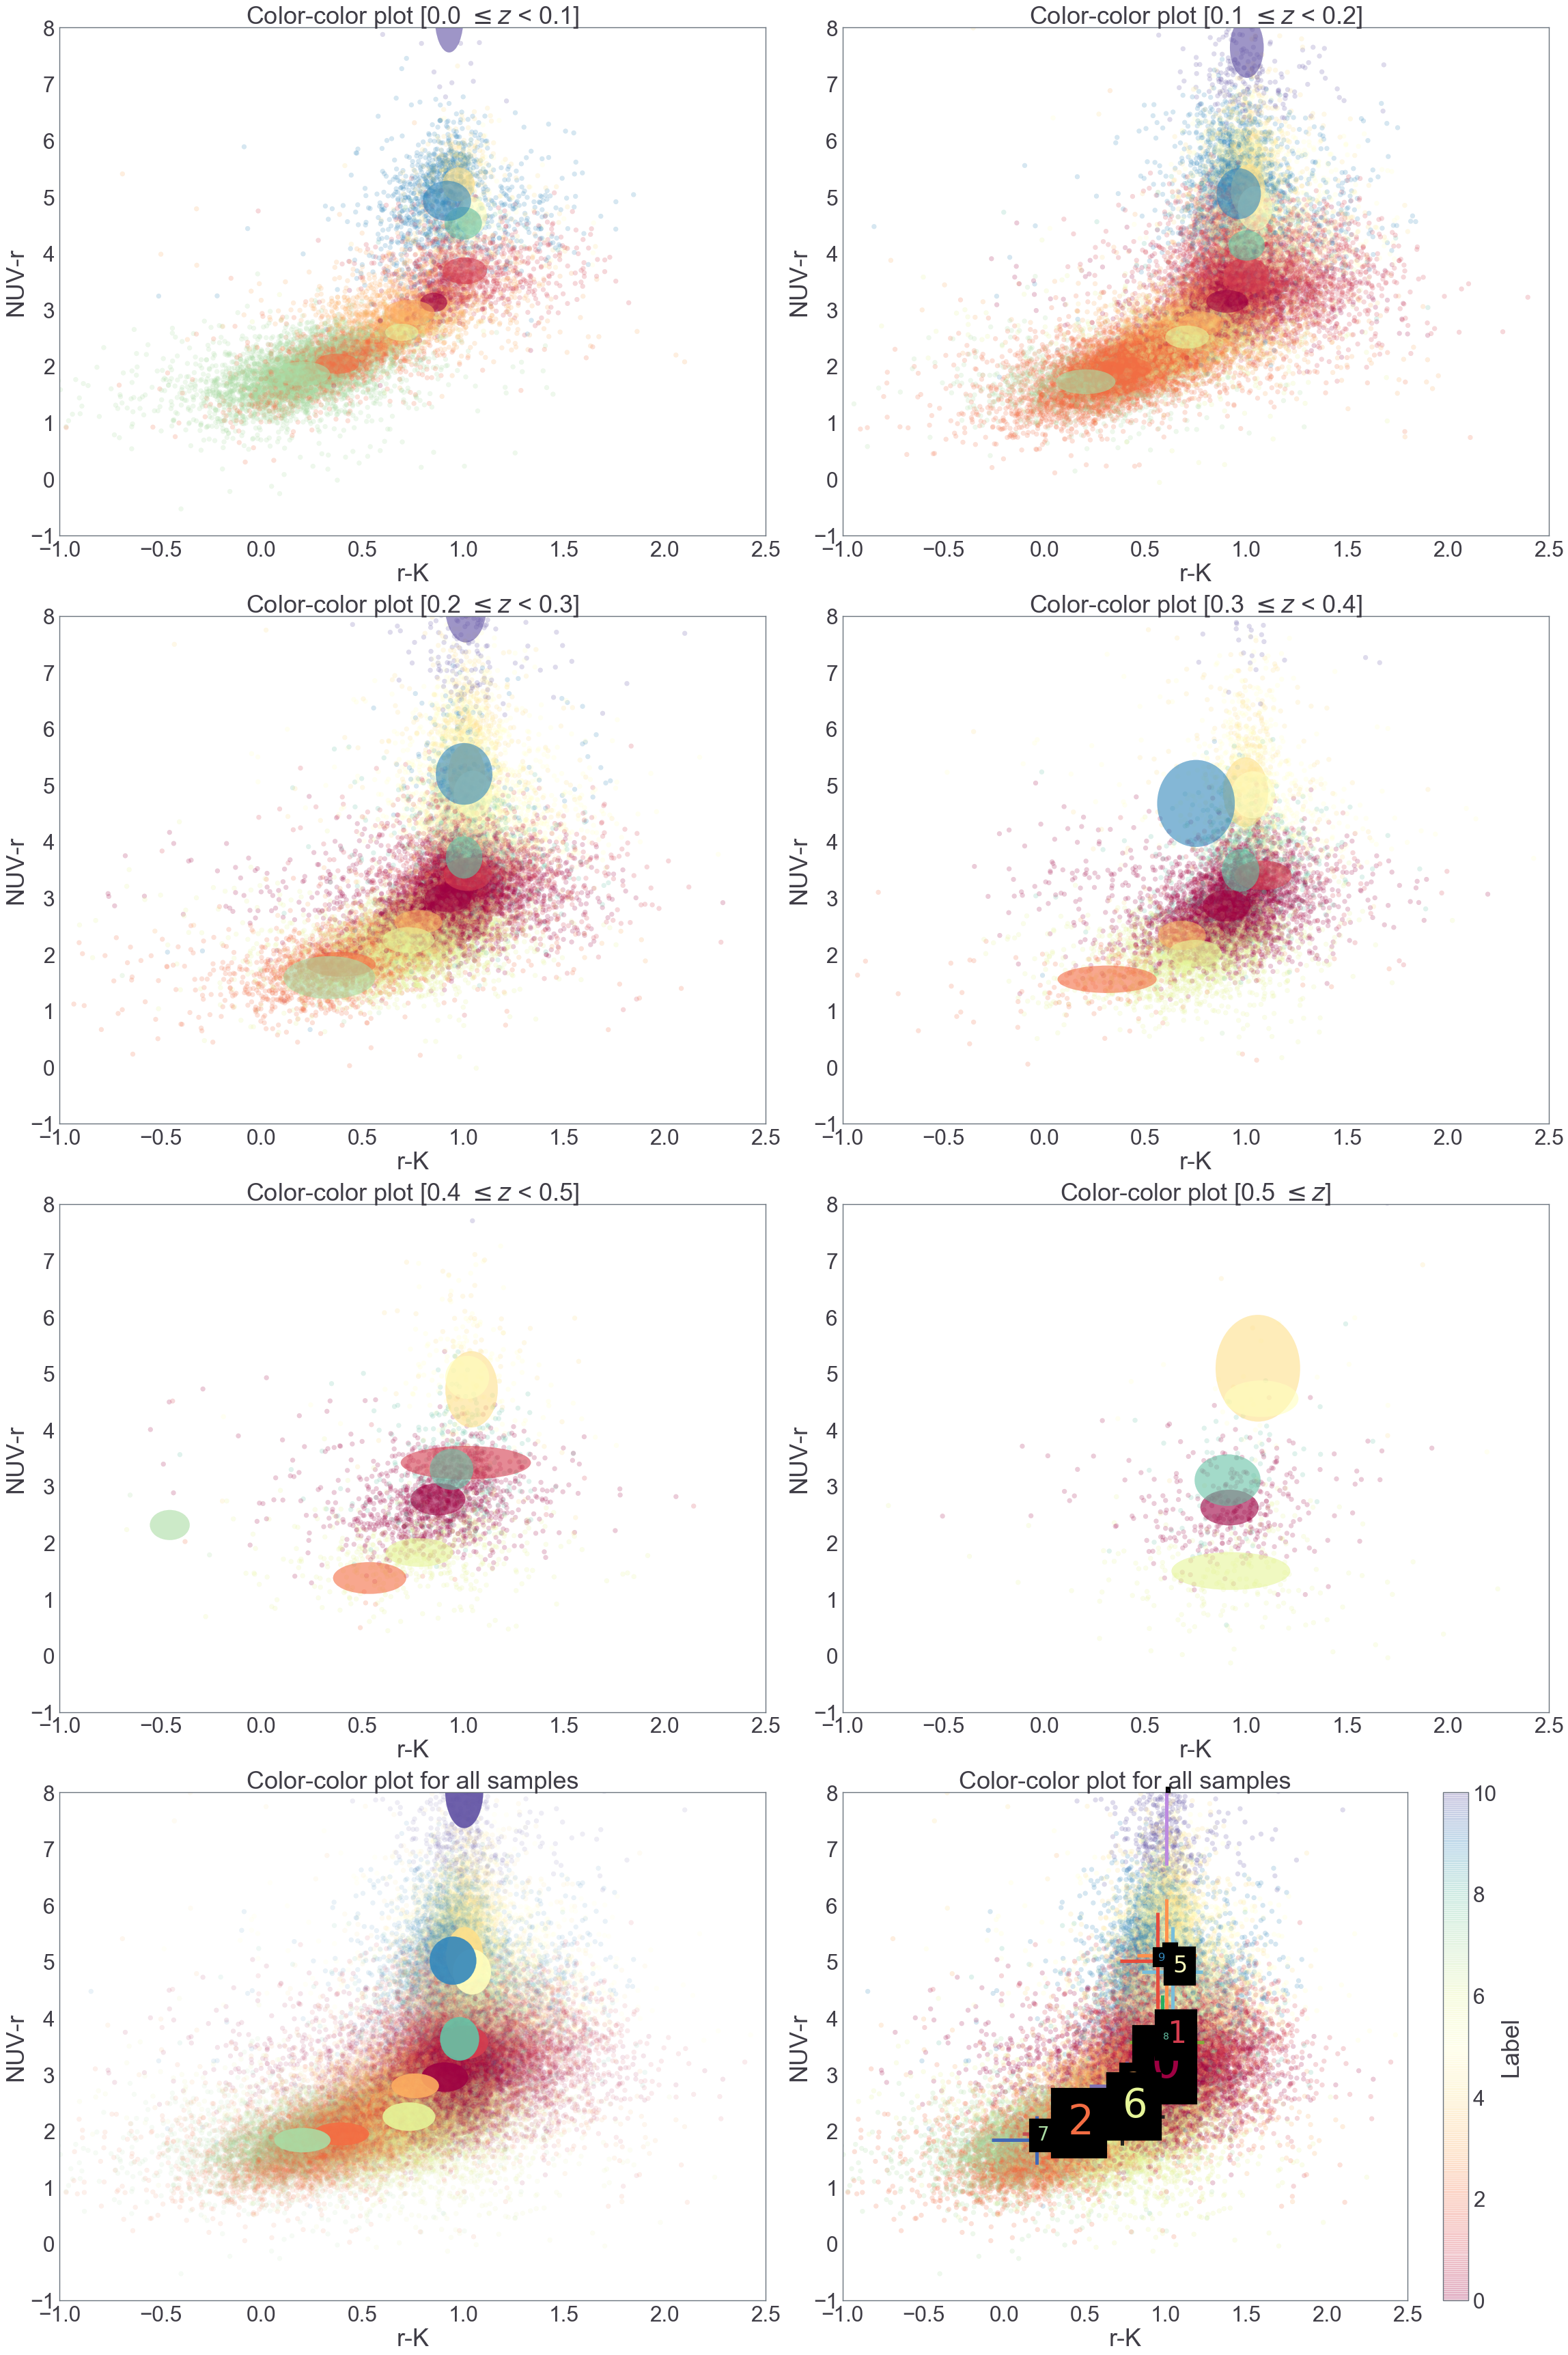

In [14]:
#  Color-color plot with colorbars based on redshift
fig = plt.figure(figsize=(32, 48))
for i in tnrange(6):
    if i <= 4:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)
    else:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)

ax = fig.add_subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.9, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
        ax.add_patch(e1)
        
plt.subplot(428)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=N_COMP-1)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(15):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5)
plt.tight_layout()